In [1]:
import mysql.connector

# Connection details
host = 'localhost'
user = 'root'
password = ''
database = 'db_smartphone'
port = 3306

# Establish a connection to the database
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
    port=port
)

print("Koneksi ke database berhasil")


Koneksi ke database berhasil


In [2]:
import pandas as pd
from IPython.display import display

def execute_query_to_dataframe(connection, query):
    try:
        # Create a cursor object
        cursor = connection.cursor(dictionary=True)
        
        # Execute the SQL query
        cursor.execute(query)
        
        # Fetch all the results
        result = cursor.fetchall()
        
        # Convert the results to a Pandas DataFrame
        df = pd.DataFrame(result)
        
        return df
        
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None
    finally:
        # Close the cursor but not the connection
        cursor.close()

# Define the SQL query for LEFT JOIN
query = """
SELECT 
    data.No,
    data.Merek,
    data.Tipe,
    data.Bulan,
    data.Jumlah_Stok,
    data.Jumlah_Terjual,
    data.Harga_Satuan_Rp,
    data.Total_Penjualan_Rp,
    data_spesifikasi.Kamera_Utama_MP,
    data_spesifikasi.Kamera_Depan_MP,
    data_spesifikasi.RAM,
    data_spesifikasi.Memori_Internal,
    data_spesifikasi.Baterai_mAh,
    data_spesifikasi.Jenis_Layar
FROM 
    data
LEFT JOIN 
    data_spesifikasi 
ON 
    data.Tipe = data_spesifikasi.Tipe;
"""

# Fetch the data and convert to DataFrame if connection is successful
if connection.is_connected():
    df = execute_query_to_dataframe(connection, query)
    if df is not None and not df.empty:
        display(df)
    else:
        print("No data found or query execution failed.")
else:
    print("No connection to the database.")


,No,Merek,Tipe,Bulan,Jumlah_Stok,Jumlah_Terjual,Harga_Satuan_Rp,Total_Penjualan_Rp,Kamera_Utama_MP,Kamera_Depan_MP,RAM,Memori_Internal,Baterai_mAh,Jenis_Layar
0,2,Samsung,Galaxy S21,Jan,10,8,10000000,80000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED
1,3,Samsung,Galaxy S21,Feb,9,7,10000000,70000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED
2,4,Samsung,Galaxy S21,Mar,8,6,10000000,60000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED
3,5,Samsung,Galaxy S21,Apr,7,5,10000000,50000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED
4,6,Samsung,Galaxy S21,May,6,4,10000000,40000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,532,Vivo,Vivo x100,Apr,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None
538,533,Vivo,Vivo x100,Feb,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None
539,534,Vivo,Vivo x100,Jan,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None
540,535,Vivo,Vivo x100,Mar,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None


In [3]:
# Persiapan data: jumlah terjual per bulan
df_klastering = df[['Bulan', 'Jumlah_Terjual']].copy()

# Pastikan data yang digunakan adalah numerik
df_klastering['Jumlah_Terjual'] = pd.to_numeric(df_klastering['Jumlah_Terjual'], errors='coerce')
df_klastering = df_klastering.dropna()

print("Data untuk klastering:")
display(df_klastering)


Data untuk klastering:


,Bulan,Jumlah_Terjual
0,Jan,8
1,Feb,7
2,Mar,6
3,Apr,5
4,May,4
...,...,...
537,Apr,13
538,Feb,13
539,Jan,13
540,Mar,13


In [4]:
from sklearn.cluster import Birch

# Inisialisasi model BIRCH
birch_model = Birch(n_clusters=None, threshold=0.5)

# Fit model BIRCH ke data
birch_model.fit(df_klastering[['Jumlah_Terjual']])

# Prediksi klaster
clusters = birch_model.predict(df_klastering[['Jumlah_Terjual']])

print("Klaster hasil prediksi:")
print(clusters)


Klaster hasil prediksi:
[ 0  0  1  1  2  2  3  4  4  0  0  1  5  5  3  3  6  4  0  1  1  2  2  7
  4  0  0  1  1  2  5  3  3  6  4  4  2  2  2  2  7  7  1  1  2  2  2  2
  0  0  5  3  3  6  4  4  8  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10
 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13  9  9  9  9  9 14 14 14 14
 14 15 15 15 15 15  8  8  8  8  8 11 11 11 11 11 16 16 16 16 16  9  9  9
  9  9 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19  8  8  8  8  8 20 20
 20 20 20 12 12 12 12 12 16 16 16 16 16  5  5  5  5  5 17 17 17 17 17 21
 21 21 21 21 15 15 15 15 15 22 22 22 22 22 16 16 16 16 16 23 23 23 23 23
 16 16 16 16 16 24 24 24 24 24 25 25 25 25 25 15 15 15 15 15 14 14 14 14
 14 26 26 26 26 26 27 27 27 27 27  8  8  8  8  8 28 28 28 28 28 15 15 15
 15 15 13 13 13 13 13  5  5  5  5  5 16 16 16 16 16 11 11 11 11 11  9  9
  9  9  9 10 10 10 10 10 28 28 28 28 28 29 29 29 29 29 14 14 14 14 14  5
  5  5  5  5  9  9  9  9  9 30 30 30 30 30 25 25 25 25 25 31 31 31 31 31
 17 17 17 17 17  8  8  8  8

In [5]:
# Tambahkan hasil klastering ke dataframe asli
df['Cluster'] = clusters

print("DataFrame dengan klaster:")
print(df)


DataFrame dengan klaster:
      No    Merek        Tipe Bulan  Jumlah_Stok  Jumlah_Terjual  \
0      2  Samsung  Galaxy S21   Jan           10               8   
1      3  Samsung  Galaxy S21   Feb            9               7   
2      4  Samsung  Galaxy S21   Mar            8               6   
3      5  Samsung  Galaxy S21   Apr            7               5   
4      6  Samsung  Galaxy S21   May            6               4   
..   ...      ...         ...   ...          ...             ...   
537  532     Vivo   Vivo x100   Apr           15              13   
538  533     Vivo   Vivo x100   Feb           15              13   
539  534     Vivo   Vivo x100   Jan           15              13   
540  535     Vivo   Vivo x100   Mar           15              13   
541  536     Vivo   Vivo x100   May           15              13   

     Harga_Satuan_Rp  Total_Penjualan_Rp  Kamera_Utama_MP  Kamera_Depan_MP  \
0           10000000            80000000             64.0             10.0   
1

In [6]:
def classify_sales(row):
    if row['Jumlah_Terjual'] <= 2:
        return 'Sangat Rendah'
    elif row['Jumlah_Terjual'] <= 5:
        return 'Rendah'
    elif row['Jumlah_Terjual'] <= 10:
        return 'Cukup'
    elif row['Jumlah_Terjual'] <= 20:
        return 'Berpotensi Tinggi'
    elif row['Jumlah_Terjual'] <= 50:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

df['Kategori_Penjualan'] = df.apply(classify_sales, axis=1)

print("DataFrame dengan kategori penjualan:")
display(df)


DataFrame dengan kategori penjualan:


,No,Merek,Tipe,Bulan,Jumlah_Stok,Jumlah_Terjual,Harga_Satuan_Rp,Total_Penjualan_Rp,Kamera_Utama_MP,Kamera_Depan_MP,RAM,Memori_Internal,Baterai_mAh,Jenis_Layar,Cluster,Kategori_Penjualan
0,2,Samsung,Galaxy S21,Jan,10,8,10000000,80000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED,0,Cukup
1,3,Samsung,Galaxy S21,Feb,9,7,10000000,70000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED,0,Cukup
2,4,Samsung,Galaxy S21,Mar,8,6,10000000,60000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED,1,Cukup
3,5,Samsung,Galaxy S21,Apr,7,5,10000000,50000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED,1,Rendah
4,6,Samsung,Galaxy S21,May,6,4,10000000,40000000,64.0,10.0,8GB,128GB,4000.0,Dynamic AMOLED,2,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,532,Vivo,Vivo x100,Apr,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None,3,Berpotensi Tinggi
538,533,Vivo,Vivo x100,Feb,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None,3,Berpotensi Tinggi
539,534,Vivo,Vivo x100,Jan,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None,3,Berpotensi Tinggi
540,535,Vivo,Vivo x100,Mar,15,13,11499500,147995000,NaN,NaN,None,None,NaN,None,3,Berpotensi Tinggi


In [7]:
# Menghitung jumlah dan persentase distribusi
distribution_counts = df['Kategori_Penjualan'].value_counts()
distribution_percentages = df['Kategori_Penjualan'].value_counts(normalize=True) * 100

# Membuat DataFrame untuk distribusi
distribution_df = pd.DataFrame({
    'Jumlah': distribution_counts,
    'Persentase (%)': distribution_percentages
})

# Menampilkan tabel distribusi
print("Distribusi Jumlah Penjualan Berdasarkan Kategori:")
display(distribution_df)




Distribusi Jumlah Penjualan Berdasarkan Kategori:


,Jumlah,Persentase (%)
Kategori_Penjualan,,
Tinggi,240,44.280443
Sangat Tinggi,135,24.907749
Berpotensi Tinggi,120,22.140221
Cukup,26,4.797048
Rendah,18,3.321033
Sangat Rendah,3,0.553506


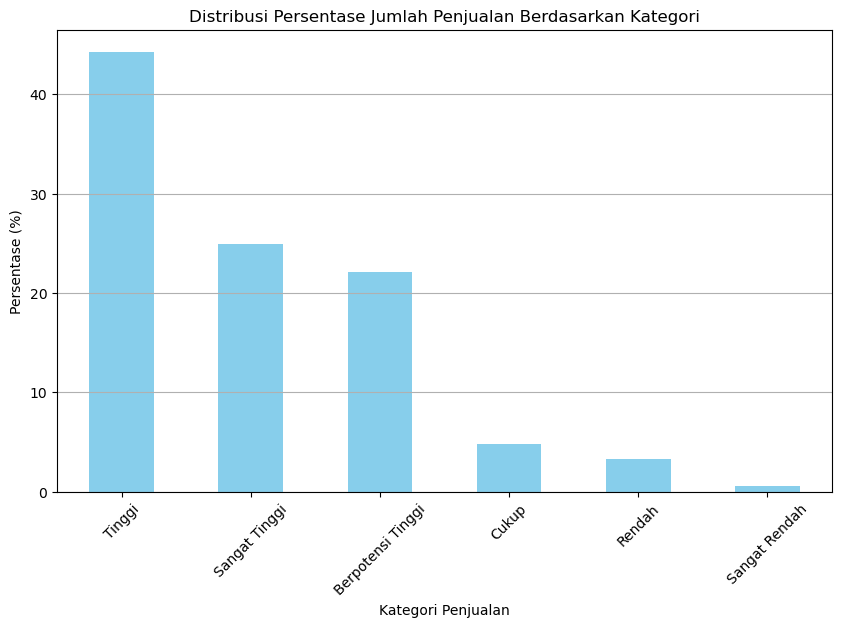

In [8]:
import matplotlib.pyplot as plt

# Menampilkan grafik distribusi
plt.figure(figsize=(10, 6))
distribution_df['Persentase (%)'].plot(kind='bar', color='skyblue')
plt.title('Distribusi Persentase Jumlah Penjualan Berdasarkan Kategori')
plt.xlabel('Kategori Penjualan')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

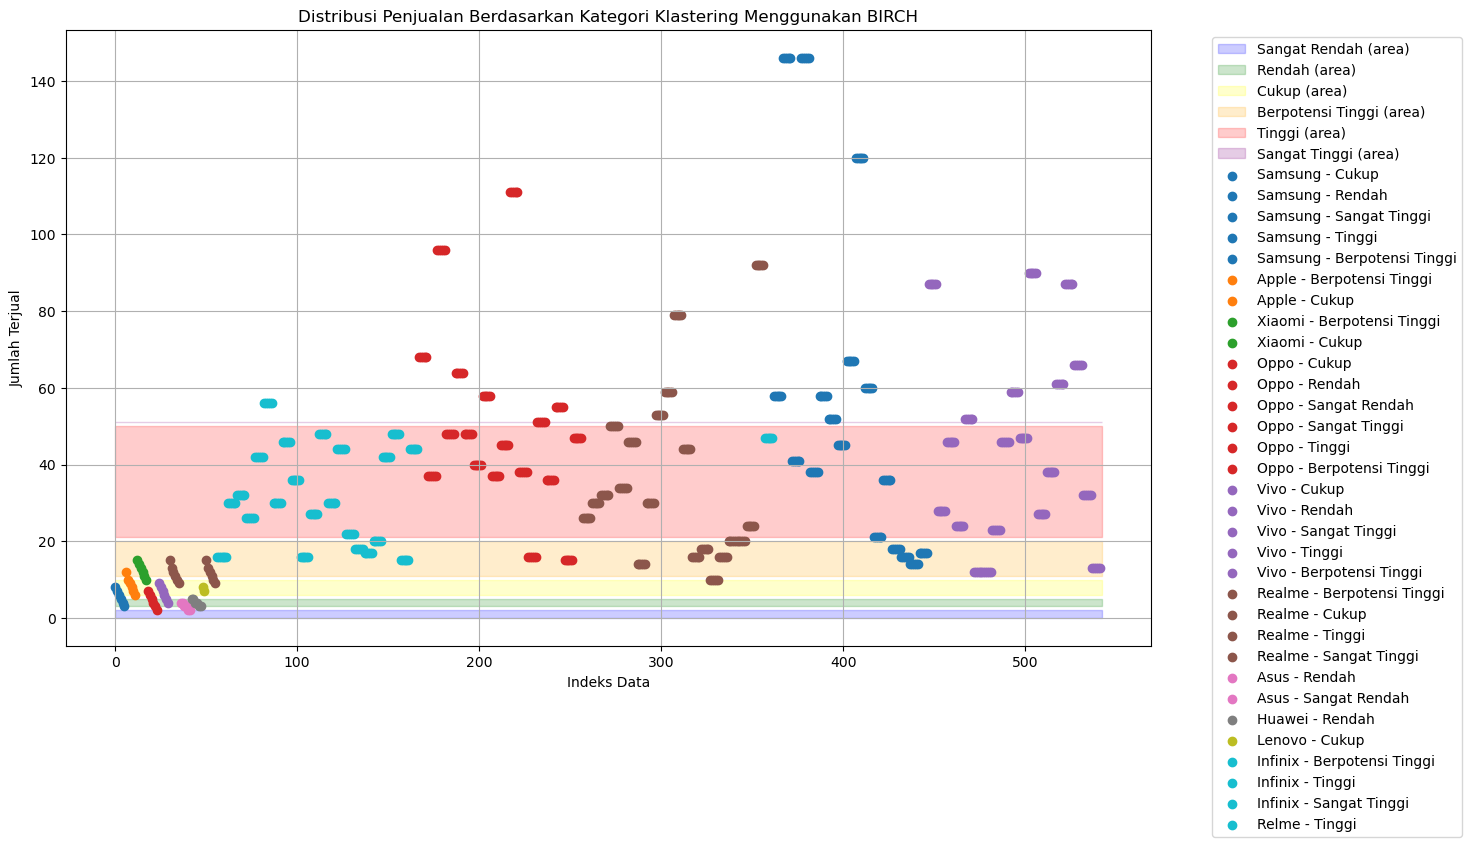

In [9]:
import numpy as np

# Definisikan batasan untuk setiap kelas
class_boundaries = {
    'Sangat Rendah': (0, 2),
    'Rendah': (3, 5),
    'Cukup': (6, 10),
    'Berpotensi Tinggi': (11, 20),
    'Tinggi': (21, 50),
    'Sangat Tinggi': (51, np.inf)
}

# Warna untuk setiap kelas
class_colors = {
    'Sangat Rendah': 'blue',
    'Rendah': 'green',
    'Cukup': 'yellow',
    'Berpotensi Tinggi': 'orange',
    'Tinggi': 'red',
    'Sangat Tinggi': 'purple'
}

# Warna untuk setiap merek
merek_colors = plt.colormaps['tab10'](np.linspace(0, 1, len(df['Merek'].unique())))

# Visualisasi hasil klastering berdasarkan kategori penjualan
plt.figure(figsize=(14, 8))

# Plot area arsiran untuk setiap kelas
for class_name, (lower, upper) in class_boundaries.items():
    plt.fill_betweenx(y=[lower, upper], x1=0, x2=len(df), color=class_colors[class_name], alpha=0.2, label=f'{class_name} (area)')

# Plot data penjualan untuk setiap merek
merek_unique = df['Merek'].unique()
for idx, merek in enumerate(merek_unique):
    subset_merek = df[df['Merek'] == merek]
    for class_name in subset_merek['Kategori_Penjualan'].unique():
        subset_kategori = subset_merek[subset_merek['Kategori_Penjualan'] == class_name]
        plt.scatter(subset_kategori.index, subset_kategori['Jumlah_Terjual'], label=f'{merek} - {class_name}', color=merek_colors[idx])

plt.title('Distribusi Penjualan Berdasarkan Kategori Klastering Menggunakan BIRCH')
plt.xlabel('Indeks Data')
plt.ylabel('Jumlah Terjual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()




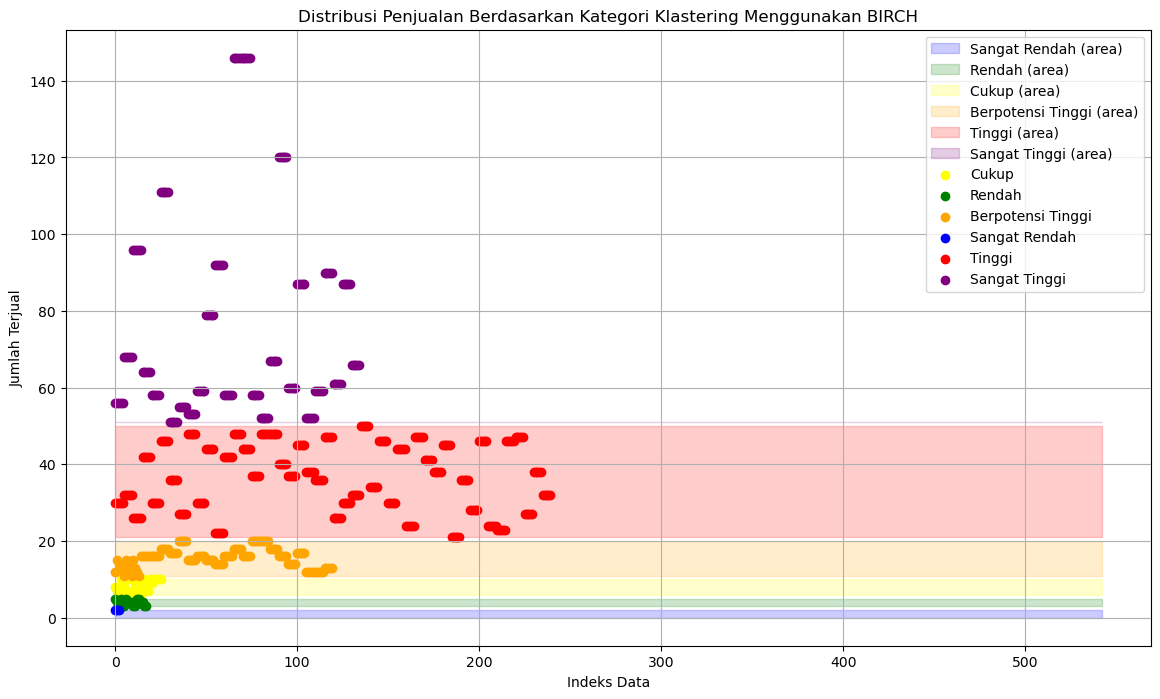

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Definisikan batasan untuk setiap kelas
class_boundaries = {
    'Sangat Rendah': (0, 2),
    'Rendah': (3, 5),
    'Cukup': (6, 10),
    'Berpotensi Tinggi': (11, 20),
    'Tinggi': (21, 50),
    'Sangat Tinggi': (51, np.inf)
}

# Warna untuk setiap kelas
class_colors = {
    'Sangat Rendah': 'blue',
    'Rendah': 'green',
    'Cukup': 'yellow',
    'Berpotensi Tinggi': 'orange',
    'Tinggi': 'red',
    'Sangat Tinggi': 'purple'
}

# Visualisasi hasil klastering berdasarkan kategori penjualan
plt.figure(figsize=(14, 8))

# Plot area arsiran untuk setiap kelas
for class_name, (lower, upper) in class_boundaries.items():
    plt.fill_betweenx(y=[lower, upper], x1=0, x2=len(df), color=class_colors[class_name], alpha=0.2, label=f'{class_name} (area)')

# Plot data penjualan
for class_name in df['Kategori_Penjualan'].unique():
    subset = df[df['Kategori_Penjualan'] == class_name]
    plt.scatter(range(len(subset)), subset['Jumlah_Terjual'], label=class_name, color=class_colors[class_name])

plt.title('Distribusi Penjualan Berdasarkan Kategori Klastering Menggunakan BIRCH')
plt.xlabel('Indeks Data')
plt.ylabel('Jumlah Terjual')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd

# Asumsi DataFrame `df` sudah ada dari proses sebelumnya

# Fungsi untuk mengklasifikasikan jumlah terjual
def classify_sales(jumlah_terjual):
    if jumlah_terjual <= 2:
        return 'Sangat Rendah'
    elif jumlah_terjual <= 5:
        return 'Rendah'
    elif jumlah_terjual <= 10:
        return 'Cukup'
    elif jumlah_terjual <= 20:
        return 'Berpotensi Tinggi'
    elif jumlah_terjual <= 50:
        return 'Tinggi'
    else:
        return 'Sangat Tinggi'

# Membuat pivot table untuk merangkum data penjualan bulanan per tipe dan merek
penjualan_bulanan = df.pivot_table(
    index=['Merek', 'Tipe'],
    columns='Bulan',
    values='Jumlah_Terjual',
    aggfunc='sum'
).reset_index()

# Mengisi nilai NaN dengan 0 (jika ada bulan yang tidak ada penjualan)
penjualan_bulanan = penjualan_bulanan.fillna(0)

# Mengklasifikasikan penjualan untuk setiap bulan
for bulan in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']:
    penjualan_bulanan[bulan] = penjualan_bulanan[bulan].apply(classify_sales)

# Menampilkan tabel hasil
print("Status Penjualan Setiap Tipe dan Merek Selama 6 Bulan:")
display(penjualan_bulanan)



Status Penjualan Setiap Tipe dan Merek Selama 6 Bulan:


Bulan,Merek,Tipe,Apr,Feb,Jan,Jun,Mar,May
0,Apple,iPhone 13,Cukup,Cukup,Berpotensi Tinggi,Cukup,Cukup,Cukup
1,Asus,ROG Phone 5,Rendah,Rendah,Rendah,Sangat Rendah,Rendah,Sangat Rendah
2,Huawei,P40 Pro,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
3,Infinix,Infinix 12 Play NFC,Tinggi,Berpotensi Tinggi,Berpotensi Tinggi,Sangat Rendah,Berpotensi Tinggi,Berpotensi Tinggi
4,Infinix,Infinix Hot 11 NFC,Tinggi,Tinggi,Tinggi,Sangat Rendah,Tinggi,Tinggi
...,...,...,...,...,...,...,...,...
101,Vivo,Vivo Y33s,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Rendah,Sangat Tinggi,Sangat Tinggi
102,Vivo,Vivo Y35,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Rendah,Sangat Tinggi,Sangat Tinggi
103,Vivo,Vivo Y36,Tinggi,Tinggi,Tinggi,Sangat Rendah,Tinggi,Tinggi
104,Vivo,Vivo x100,Berpotensi Tinggi,Berpotensi Tinggi,Berpotensi Tinggi,Sangat Rendah,Berpotensi Tinggi,Berpotensi Tinggi


In [13]:
import pandas as pd

# Asumsi DataFrame `df` sudah ada dari proses sebelumnya

# Membuat pivot table untuk merangkum data penjualan bulanan per tipe dan merek
penjualan_bulanan = df.pivot_table(
    index=['Merek', 'Tipe'],
    columns='Bulan',
    values='Jumlah_Terjual',
    aggfunc='sum'
).reset_index()

# Mengisi nilai NaN dengan 0 (jika ada bulan yang tidak ada penjualan)
penjualan_bulanan = penjualan_bulanan.fillna(0)

# Menampilkan tabel hasil
print("Penjualan Bulanan Setiap Tipe dan Merek Selama 6 Bulan:")
display(penjualan_bulanan)


Penjualan Bulanan Setiap Tipe dan Merek Selama 6 Bulan:


Bulan,Merek,Tipe,Apr,Feb,Jan,Jun,Mar,May
0,Apple,iPhone 13,8.0,10.0,12.0,6.0,9.0,7.0
1,Asus,ROG Phone 5,3.0,4.0,4.0,2.0,3.0,2.0
2,Huawei,P40 Pro,4.0,5.0,5.0,3.0,4.0,3.0
3,Infinix,Infinix 12 Play NFC,32.0,16.0,16.0,0.0,16.0,16.0
4,Infinix,Infinix Hot 11 NFC,30.0,30.0,30.0,0.0,30.0,30.0
...,...,...,...,...,...,...,...,...
101,Vivo,Vivo Y33s,87.0,87.0,87.0,0.0,87.0,87.0
102,Vivo,Vivo Y35,66.0,66.0,66.0,0.0,66.0,66.0
103,Vivo,Vivo Y36,32.0,32.0,32.0,0.0,32.0,32.0
104,Vivo,Vivo x100,13.0,13.0,13.0,0.0,13.0,13.0
